In [51]:
import gym
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Environment initialization
env = gym.make('Taxi-v2')

[2018-04-15 18:32:40,186] Making new env: Taxi-v2


In [56]:
# Q and rewards
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards = []
iterations = []

# Parameters
alpha = 0.75
discount = 0.95
episodes = 5000

In [57]:
# Episodes
for episode in range(episodes):
    # Refresh state
    state = env.reset()
    done = False
    t_reward = 0
    max_steps = env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')

    # Run episode
    for i in range(max_steps):
        if done:
            break

        current = state
        #action = env.action_space.sample()
        action = np.argmax(Q[current,:] + np.random.randn(1, env.action_space.n) * (1 / float(episode + 1)))

        state, reward, done, info = env.step(action)
        t_reward += reward
        Q[current, action] += alpha * (reward + discount * np.max(Q[state,:]) - Q[current, action])

    rewards.append(t_reward)
    iterations.append(i)

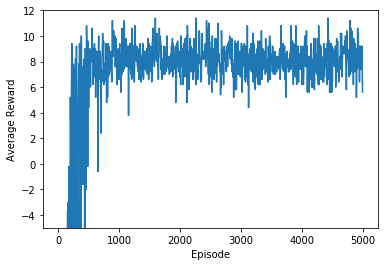

In [64]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

size = 5
chunks = list(chunk_list(rewards, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

plt.plot(list(range(0, len(rewards), size)), averages)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.ylim(-5, 12)
plt.show()

In [59]:
policy = np.argmax(Q, axis=1)


In [60]:
def test_policy_Taxi(policy, env_name):
    problem = gym.make(env_name)
    done = False
    total_rewards = []
    num_steps = []
    for i in range(1000):
        state = problem.reset()
        done = False
        i = 0
        ep_reward = 0
        while not done:
            #print ("state is :{} ".format(state))
            #print (agent.Q[state])

            action = policy[state]
            #print ("action is :{}".format(action))

            state , reward, done, _ = problem.step(action)
            i +=1
            ep_reward+=reward
            #problem.render()
        #problem.render()
        total_rewards.append(ep_reward)
        num_steps.append(i)

    print ("Average Episode Reward: {}".format(np.mean(total_rewards)))
    print ("Average Steps: {}".format(np.mean(num_steps)))

In [61]:
test_policy_Taxi(policy, 'Taxi-v2')

[2018-04-15 18:44:40,987] Making new env: Taxi-v2


Average Episode Reward: 8.192
Average Steps: 12.808
